In [1]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from numpy import median

RANDOM_SEED = 2022

# Data Visualization

In [2]:
#Read CSV file
db = pd.read_csv('../datasets/training_data.csv')
test = pd.read_csv('../datasets/test_data.csv')

In [3]:
# See first 5 lines
db.head()

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High


In [4]:
#See all Stats
db.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


In [5]:
# See column names
db.columns

Index(['city_name', 'magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_precipitation', 'avg_rain',
       'incidents'],
      dtype='object')

In [6]:
# Check null values
db.isnull().sum()

city_name              0
magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_precipitation      0
avg_rain               0
incidents              0
dtype: int64

In [7]:
#Check missing values
db.isna().any()

city_name             False
magnitude_of_delay    False
delay_in_seconds      False
affected_roads         True
record_date           False
luminosity            False
avg_temperature       False
avg_atm_pressure      False
avg_humidity          False
avg_wind_speed        False
avg_precipitation     False
avg_rain              False
incidents             False
dtype: bool

In [8]:
#Check duplicates
db.duplicated().sum()

0

In [9]:
# See types of each attribute
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [10]:
# See number of different values of each attribute
db.nunique()

city_name                1
magnitude_of_delay       3
delay_in_seconds      1186
affected_roads         678
record_date           5000
luminosity               3
avg_temperature         35
avg_atm_pressure        36
avg_humidity            83
avg_wind_speed          11
avg_precipitation        1
avg_rain                 4
incidents                5
dtype: int64

In [11]:
# See content of first 5 lines of attribute 'Affected Roads' 
db['affected_roads'].head()

0                                                    ,
1                                                N101,
2                                                    ,
3    N101,R206,N105,N101,N101,N101,N101,N101,N101,N...
4                            N101,N101,N101,N101,N101,
Name: affected_roads, dtype: object

In [12]:
db['magnitude_of_delay'].value_counts()

UNDEFINED    4314
MAJOR         678
MODERATE        8
Name: magnitude_of_delay, dtype: int64

In [13]:
db['luminosity'].value_counts()

DARK         2489
LIGHT        2325
LOW_LIGHT     186
Name: luminosity, dtype: int64

In [14]:
db['avg_rain'].value_counts()

Sem Chuva         4756
chuva fraca        214
chuva moderada      27
chuva forte          3
Name: avg_rain, dtype: int64

In [15]:
db['incidents'].value_counts()

None         2028
High         1073
Low           718
Very_High     603
Medium        578
Name: incidents, dtype: int64

In [16]:
db['avg_wind_speed'].value_counts()

1.0     1745
0.0     1590
2.0      973
3.0      367
4.0      207
5.0       73
6.0       34
8.0        5
7.0        4
10.0       1
0.5        1
Name: avg_wind_speed, dtype: int64

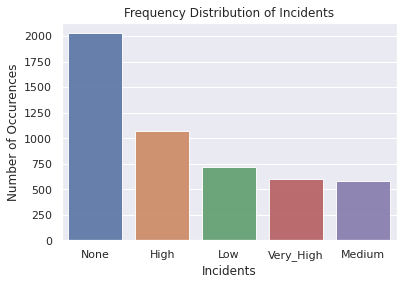

In [17]:
# See Level of Incidents distribution
incidents_count = db['incidents'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x = incidents_count.index, y = incidents_count.values, alpha=0.9)
plt.title('Frequency Distribution of Incidents')
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Incidents',fontsize=12)
plt.show()

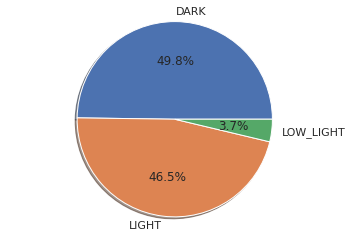

In [18]:
# See Luminosity distribution
labels=db['luminosity'].astype('category').cat.categories.tolist()
counts=db['luminosity'].value_counts()
sizes=[counts[var_cat] for var_cat in labels]
fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

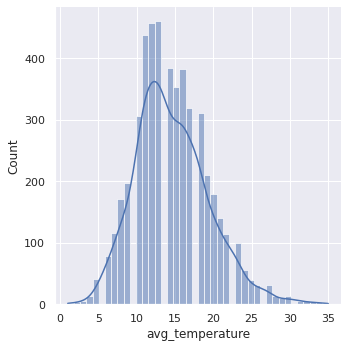

In [19]:
# See Average Temperature distribution
sns.displot(db, x="avg_temperature", kde=True)

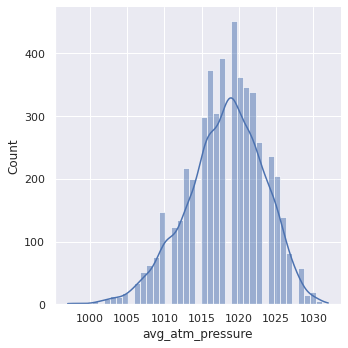

In [20]:
# See Average Atmospheric Pressure distribution
sns.displot(db, x="avg_atm_pressure", kde=True)

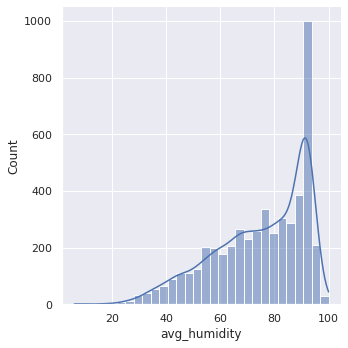

In [21]:
# See Average Humidity distribution
sns.displot(db, x="avg_humidity", kde=True)

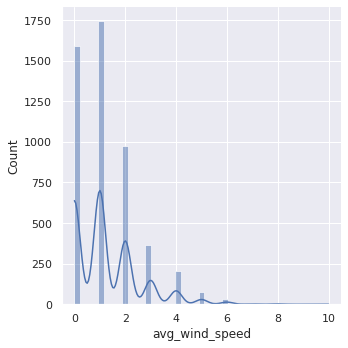

In [22]:
# See Average Wind Speed distribution
sns.displot(db, x="avg_wind_speed", kde=True)

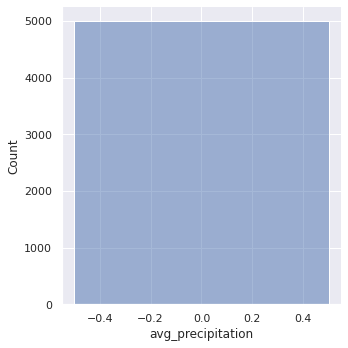

In [23]:
# See Average Precipitation distribution
sns.displot(db, x="avg_precipitation", kde=True)

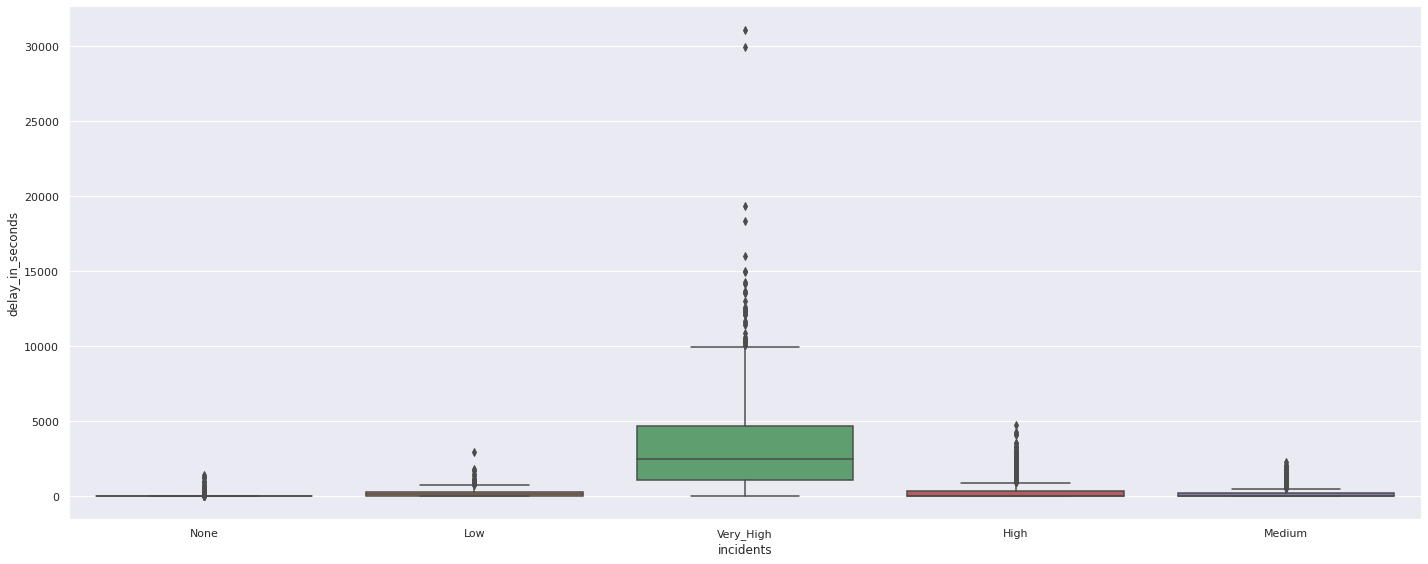

In [24]:
# Relationship between the level of incidents and the delay (in seconds)
sns.catplot( x="incidents", y="delay_in_seconds", data=db, kind="box", height=8, aspect=2.5)
plt.show()

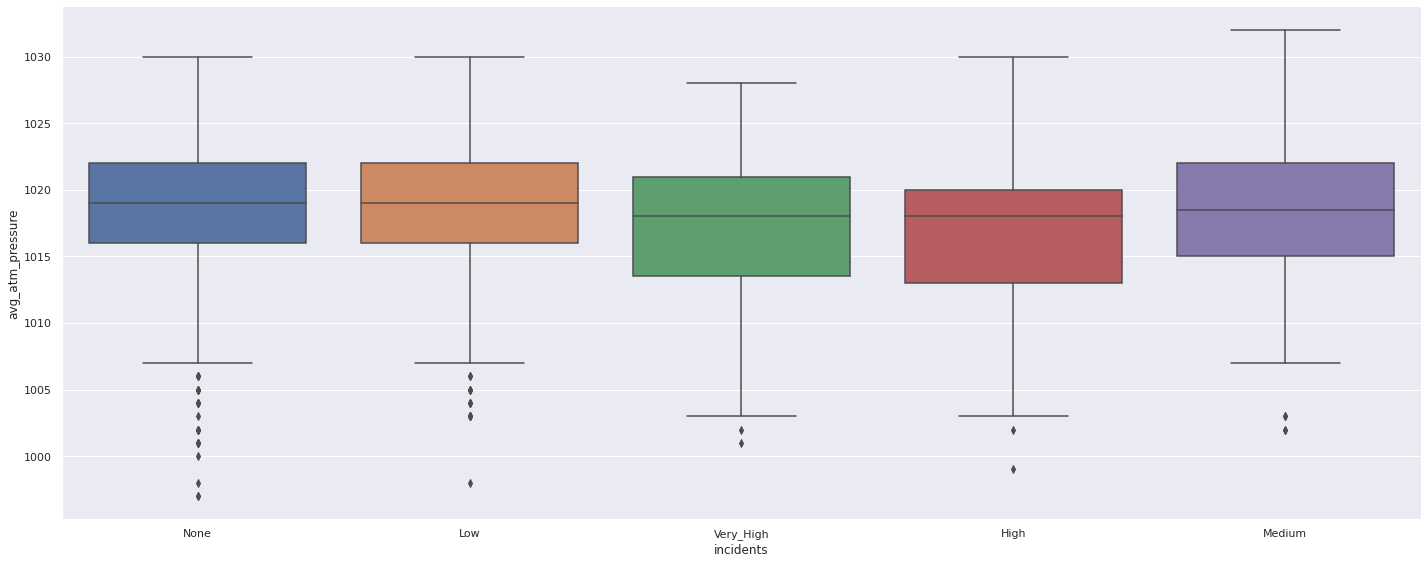

In [25]:
# Relationship between the level of incidents and the atmospheric pressure
sns.catplot( x="incidents", y="avg_atm_pressure", data=db, kind="box", height=8, aspect=2.5)
plt.show()

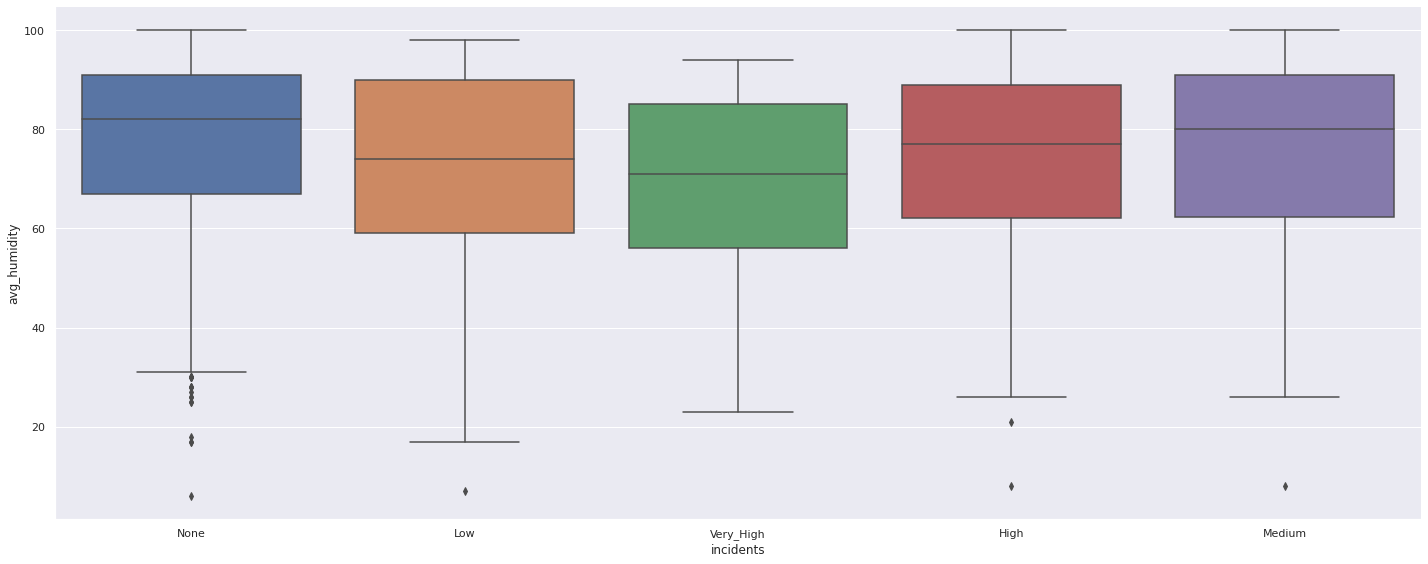

In [26]:
# Relationship between the level of incidents and the humidity
sns.catplot( x="incidents", y="avg_humidity", data=db, kind="box", height=8, aspect=2.5)
plt.show()

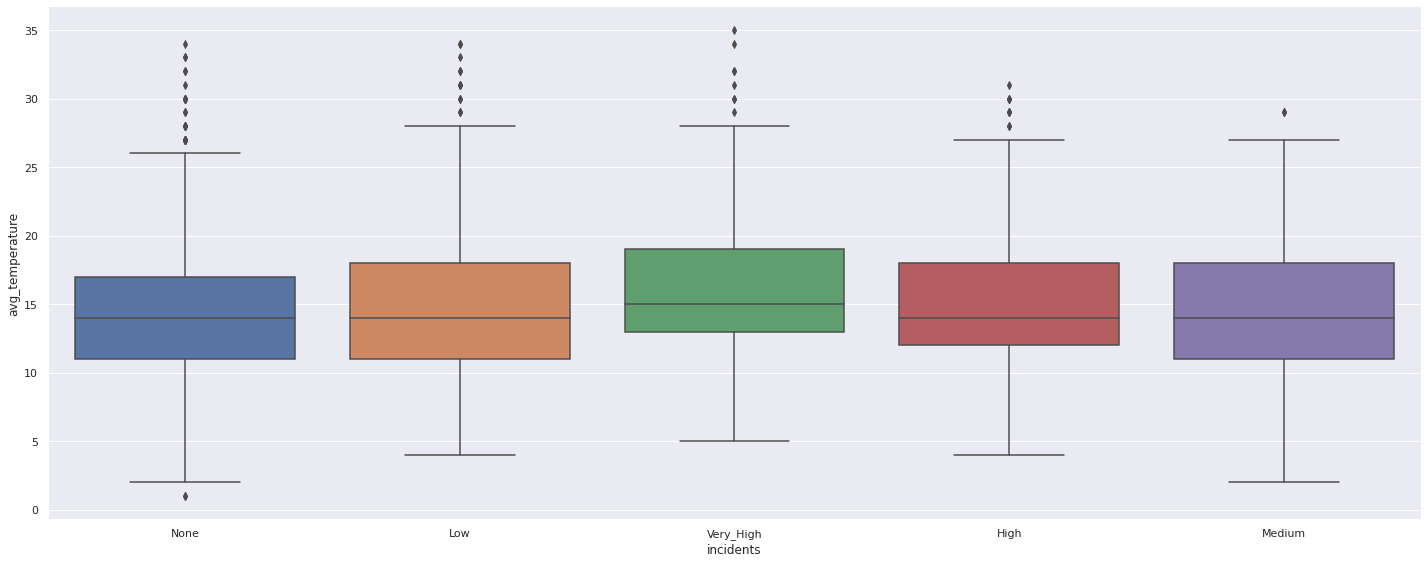

In [27]:
# Relationship between the level of incidents and the temperature
sns.catplot( x="incidents", y="avg_temperature", data=db, kind="box", height=8, aspect=2.5)
plt.show()

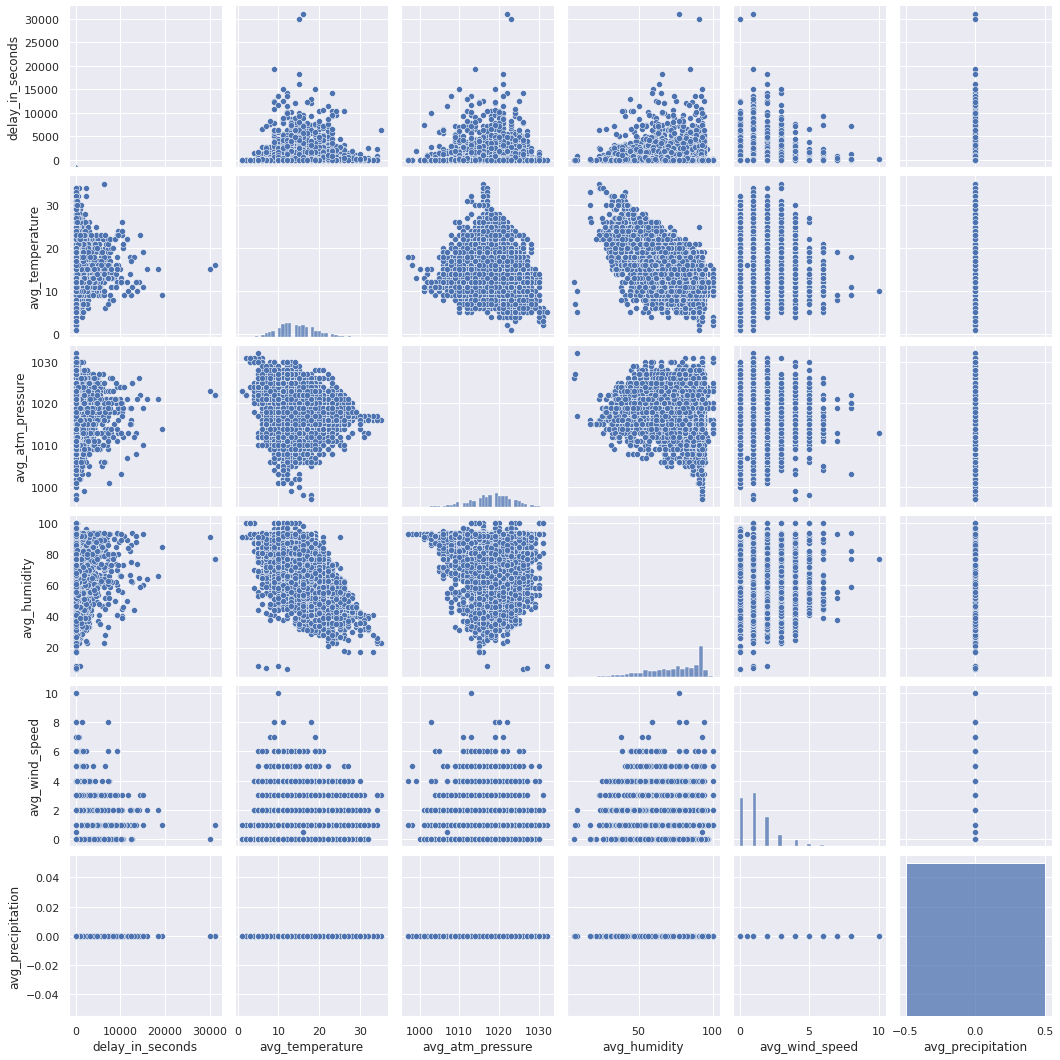

In [28]:
sns.pairplot(db)

<AxesSubplot:>

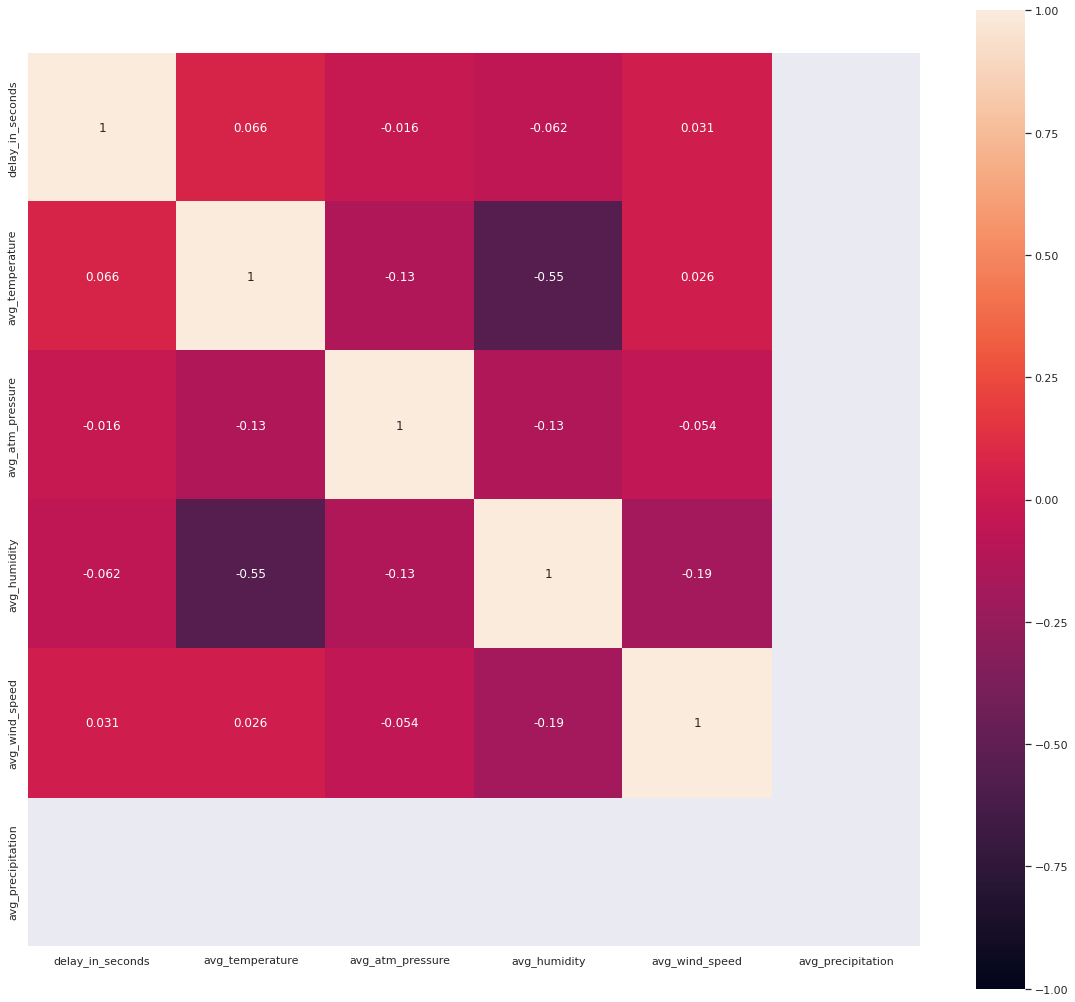

In [29]:
# Correlation between all data
corr_matrix = db.corr()
f,ax = plt.subplots(figsize=(20,18))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,square=True,annot=True)


# Data Preparation

In [30]:
# Calculate IQR (Inter Quartile Range)
print("Old Dimensions: ", db.shape)
db.loc[np.abs(stats.zscore(db['avg_temperature'])) >= 3, 'avg_temperature'] = np.nan
db['avg_temperature'].fillna(db['avg_temperature'].median(),inplace=True)
#db = db[np.abs(stats.zscore(db['avg_temperature'])) < 3]
print("New Dimensions: ", db.shape)

Old Dimensions:  (5000, 13)
New Dimensions:  (5000, 13)


In [31]:
# Calculate IQR (Inter Quartile Range)
print("Old Dimensions: ", db.shape)
db.loc[np.abs(stats.zscore(db['avg_atm_pressure'])) >= 3, 'avg_atm_pressure'] = np.nan
db['avg_atm_pressure'].fillna(db['avg_atm_pressure'].median(),inplace=True)
#db = db[np.abs(stats.zscore(db['avg_atm_pressure'])) < 3]
print("New Dimensions: ", db.shape)

Old Dimensions:  (5000, 13)
New Dimensions:  (5000, 13)


In [32]:
# Calculate IQR (Inter Quartile Range)
print("Old Dimensions: ", db.shape)
db.loc[np.abs(stats.zscore(db['avg_humidity'])) >= 3, 'avg_humidity'] = np.nan
db['avg_humidity'].fillna(db['avg_humidity'].median(),inplace=True)
#db = db[np.abs(stats.zscore(db['avg_humidity'])) < 3]
print("New Dimensions: ", db.shape)

Old Dimensions:  (5000, 13)
New Dimensions:  (5000, 13)


In [33]:
# Calculate IQR (Inter Quartile Range)
print("Old Dimensions: ", db.shape)
db.loc[np.abs(stats.zscore(db['delay_in_seconds'])) >= 3, 'delay_in_seconds'] = np.nan
db['delay_in_seconds'].fillna(db['delay_in_seconds'].median(),inplace=True)
#db = db[np.abs(stats.zscore(db['delay_in_seconds'])) < 3]
print("New Dimensions: ", db.shape)

Old Dimensions:  (5000, 13)
New Dimensions:  (5000, 13)


In [34]:
#Drop columns in Training Data
db.drop(['city_name'],axis=1,inplace=True)
db.drop(['avg_precipitation'],axis=1,inplace=True)
db.drop(['magnitude_of_delay'],axis=1,inplace=True)
#db.dropna(inplace=True)

In [35]:
#Drop columns in Test Data
test.drop(['city_name'],axis=1,inplace=True)
test.drop(['avg_precipitation'],axis=1,inplace=True)
test.drop(['magnitude_of_delay'],axis=1,inplace=True)
test['affected_roads'] = test['affected_roads'].fillna(",")
#test.dropna(inplace=True)

In [36]:
test.isna().sum()

delay_in_seconds    0
affected_roads      0
record_date         0
luminosity          0
avg_temperature     0
avg_atm_pressure    0
avg_humidity        0
avg_wind_speed      0
avg_rain            0
dtype: int64

### Label encoding ( luminosity, magnitude_of_delay, avg_rain, incidents)

In [37]:
# Label Enconding: Incidents
replace_map = {'None':0,'Low':1,'Medium':2, 'High':3, 'Very_High':4}
db['incidents'] = db['incidents'].replace(replace_map)

In [38]:
# Label Enconding: Luminosity
replace_map_lum = {'DARK': 0, 'LOW_LIGHT': 1, 'LIGHT': 1}
db['luminosity'] = db['luminosity'].replace(replace_map_lum)
test['luminosity'] = test['luminosity'].replace(replace_map_lum)

In [39]:
# Label Enconding: Average Rain
replace_map_rain = {'Sem Chuva': 0, 'chuva fraca': 1, 'chuva moderada': 2, 'chuva forte': 3}
db['avg_rain'] = db['avg_rain'].replace(replace_map_rain)
test['avg_rain'] = test['avg_rain'].replace(replace_map_rain)

In [40]:
db.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,0.0,",",2021-03-15 23:00,0,12.0,1013.0,70.0,1.0,0,0
1,385.0,"N101,",2021-12-25 18:00,0,12.0,1007.0,91.0,1.0,0,0
2,69.0,",",2021-03-12 15:00,1,14.0,1025.0,64.0,0.0,0,1
3,2297.0,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,1,15.0,1028.0,75.0,1.0,0,4
4,0.0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,1,27.0,1020.0,52.0,1.0,0,3


In [41]:
# Handle dates
db['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [42]:
db['record_date'] = pd.to_datetime(db['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')
test['record_date'] = pd.to_datetime(test['record_date'],format='%Y-%m-%d %H:%M',errors='coerce')

In [43]:
assert db['record_date'].isnull().sum()==0, 'missing record date'
db['record_date'].head()

0   2021-03-15 23:00:00
1   2021-12-25 18:00:00
2   2021-03-12 15:00:00
3   2021-09-29 09:00:00
4   2021-06-13 11:00:00
Name: record_date, dtype: datetime64[ns]

In [44]:
assert test['record_date'].isnull().sum()==0, 'missing record date'
test['record_date'].head()

0   2021-04-13 19:00:00
1   2021-10-13 04:00:00
2   2021-07-18 19:00:00
3   2021-10-30 15:00:00
4   2021-10-18 10:00:00
Name: record_date, dtype: datetime64[ns]

In [45]:
#Create new columns from 'record date'
db['year'] = db['record_date'].dt.year
db['month'] = db['record_date'].dt.month
db['day'] = db['record_date'].dt.day
db['hour'] = db['record_date'].dt.hour
db['minute'] = db['record_date'].dt.minute

In [46]:
test['year'] = test['record_date'].dt.year
test['month'] = test['record_date'].dt.month
test['day'] = test['record_date'].dt.day
test['hour'] = test['record_date'].dt.hour
test['minute'] = test['record_date'].dt.minute

In [47]:
db.head()

,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,year,month,day,hour,minute
0,0.0,",",2021-03-15 23:00:00,0,12.0,1013.0,70.0,1.0,0,0,2021,3,15,23,0
1,385.0,"N101,",2021-12-25 18:00:00,0,12.0,1007.0,91.0,1.0,0,0,2021,12,25,18,0
2,69.0,",",2021-03-12 15:00:00,1,14.0,1025.0,64.0,0.0,0,1,2021,3,12,15,0
3,2297.0,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00:00,1,15.0,1028.0,75.0,1.0,0,4,2021,9,29,9,0
4,0.0,"N101,N101,N101,N101,N101,",2021-06-13 11:00:00,1,27.0,1020.0,52.0,1.0,0,3,2021,6,13,11,0


In [48]:
# Unique values
print("Unique Values")
print("Year: " + str(db['year'].nunique()))
print("Month: " + str(db['month'].nunique()))
print("Day: " + str(db['day'].nunique()))
print("Hour: " + str(db['hour'].nunique()))
print("Minute: " + str(db['minute'].nunique()))

Unique Values
Year: 1
Month: 11
Day: 31
Hour: 24
Minute: 1


In [49]:
#Ano e minuto só têm 1 valor, logo vamos retirar esses parâmetros
db.drop('year',axis=1,inplace=True)
db.drop('minute',axis=1,inplace=True)
db.drop('record_date',axis=1,inplace=True)
#db.dropna(inplace=True)

In [50]:
test.drop('year',axis=1,inplace=True)
test.drop('minute',axis=1,inplace=True)
test.drop('record_date',axis=1,inplace=True)
#test.dropna(inplace=True)

In [51]:
# Função para criar uma nova coluna com o número de ruas afetadas (em vez da lista)
def count_roads(row):
    if type(row['affected_roads']) is float: 
        return -1
    roads = row['affected_roads'].split(",")
    filtered = []

    for road in roads:
        if road != '':
            filtered.append(road)

    return len(filtered)

In [52]:
# Criar nova coluna com número de ruas afetadas
db['number_of_affected_roads'] = db.apply(lambda row: count_roads(row), axis=1)
db.drop(['affected_roads'],axis=1,inplace=True)

test['number_of_affected_roads'] = test.apply(lambda row: count_roads(row), axis=1)
test.drop(['affected_roads'],axis=1,inplace=True)

In [53]:
#Substitui valores que se encontravam como NaN na coluna de "affected roads" com a mediana
def substitute_mean(row):
    if row['number_of_affected_roads'] == -1:
        row['number_of_affected_roads'] = db['number_of_affected_roads'].median()

In [54]:
db.apply(lambda row: substitute_mean(row), axis=1)
test.apply(lambda row: substitute_mean(row), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1201    None
1202    None
1203    None
1204    None
1205    None
Length: 1206, dtype: object

In [55]:
db.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,month,day,hour,number_of_affected_roads
0,0.0,0,12.0,1013.0,70.0,1.0,0,0,3,15,23,0
1,385.0,0,12.0,1007.0,91.0,1.0,0,0,12,25,18,1
2,69.0,1,14.0,1025.0,64.0,0.0,0,1,3,12,15,0
3,2297.0,1,15.0,1028.0,75.0,1.0,0,4,9,29,9,11
4,0.0,1,27.0,1020.0,52.0,1.0,0,3,6,13,11,5


In [56]:
#Normalize Delay in Seconds values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['delay_in_seconds']] = min_max_scaler.fit_transform(db[['delay_in_seconds']])
test[['delay_in_seconds']] = min_max_scaler.fit_transform(test[['delay_in_seconds']])

In [57]:
#Normalize Luminosity values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['luminosity']] = min_max_scaler.fit_transform(db[['luminosity']])
test[['luminosity']] = min_max_scaler.fit_transform(test[['luminosity']])

In [58]:
#Normalize Average Temperature values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['avg_temperature']] = min_max_scaler.fit_transform(db[['avg_temperature']])
test[['avg_temperature']] = min_max_scaler.fit_transform(test[['avg_temperature']])

In [59]:
#Normalize Average Atmospheric Pressure values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['avg_atm_pressure']] = min_max_scaler.fit_transform(db[['avg_atm_pressure']])
test[['avg_atm_pressure']] = min_max_scaler.fit_transform(test[['avg_atm_pressure']])

In [60]:
#Normalize Average Humidity values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['avg_humidity']] = min_max_scaler.fit_transform(db[['avg_humidity']])
test[['avg_humidity']] = min_max_scaler.fit_transform(test[['avg_humidity']])

In [61]:
#Normalize Average Wind Speed values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['avg_wind_speed']] = min_max_scaler.fit_transform(db[['avg_wind_speed']])
test[['avg_wind_speed']] = min_max_scaler.fit_transform(test[['avg_wind_speed']])

In [62]:
#Normalize Average Rain values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['avg_rain']] = min_max_scaler.fit_transform(db[['avg_rain']])
test[['avg_rain']] = min_max_scaler.fit_transform(test[['avg_rain']])

In [63]:
#Normalize Number of Affected Roads values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
db[['number_of_affected_roads']] = min_max_scaler.fit_transform(db[['number_of_affected_roads']])
test[['number_of_affected_roads']] = min_max_scaler.fit_transform(test[['number_of_affected_roads']])

In [64]:
db.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,month,day,hour,number_of_affected_roads
0,0.000000,0.0,0.392857,0.344828,0.610390,0.1,0.0,0,3,15,23,0.021277
1,0.069344,0.0,0.392857,0.137931,0.883117,0.1,0.0,0,12,25,18,0.042553
2,0.012428,1.0,0.464286,0.758621,0.532468,0.0,0.0,1,3,12,15,0.021277
3,0.413725,1.0,0.500000,0.862069,0.675325,0.1,0.0,4,9,29,9,0.255319
4,0.000000,1.0,0.928571,0.586207,0.376623,0.1,0.0,3,6,13,11,0.127660


In [65]:
test.head()

,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,month,day,hour,number_of_affected_roads
0,0.081461,1.0,0.464286,0.59375,0.784946,0.000000,0.0,4,13,19,0.157895
1,0.000000,0.0,0.500000,0.59375,0.365591,0.222222,0.0,10,13,4,0.131579
2,0.000000,1.0,0.714286,0.56250,0.688172,0.000000,0.0,7,18,19,0.131579
3,0.009417,1.0,0.571429,0.28125,0.795699,0.333333,0.0,10,30,15,0.157895
4,0.000000,1.0,0.642857,0.71875,0.849462,0.000000,0.0,10,18,10,0.131579


In [66]:
db.shape

(5000, 12)

In [67]:
test.shape

(1206, 11)

In [68]:
db.isna().sum()

delay_in_seconds            0
luminosity                  0
avg_temperature             0
avg_atm_pressure            0
avg_humidity                0
avg_wind_speed              0
avg_rain                    0
incidents                   0
month                       0
day                         0
hour                        0
number_of_affected_roads    0
dtype: int64

# Decision Tree Classifier

In [69]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   delay_in_seconds          5000 non-null   float64
 1   luminosity                5000 non-null   float64
 2   avg_temperature           5000 non-null   float64
 3   avg_atm_pressure          5000 non-null   float64
 4   avg_humidity              5000 non-null   float64
 5   avg_wind_speed            5000 non-null   float64
 6   avg_rain                  5000 non-null   float64
 7   incidents                 5000 non-null   int64  
 8   month                     5000 non-null   int64  
 9   day                       5000 non-null   int64  
 10  hour                      5000 non-null   int64  
 11  number_of_affected_roads  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 468.9 KB


In [70]:
x = db.drop(['incidents'], axis=1)
y = db['incidents'].to_frame()

In [71]:
print(y.shape)

(5000, 1)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=RANDOM_SEED)
print("X %s; X_train %s; X_test %s" %(x.shape,X_train.shape,X_test.shape))
print("y %s; y_train %s; y_test %s" %(y.shape,y_train.shape,y_test.shape))

X (5000, 11); X_train (3750, 11); X_test (1250, 11)
y (5000, 1); y_train (3750, 1); y_test (1250, 1)


In [73]:
clf = DecisionTreeClassifier(random_state=RANDOM_SEED)
clf.fit(X_train,np.ravel(y_train))

DecisionTreeClassifier(random_state=2022)

In [74]:
pred_dtc = clf.predict(X_test)

In [75]:
accuracy_score(y_test,pred_dtc)

0.9032

In [76]:
precision_score(y_test,pred_dtc,average='micro')

0.9032

In [77]:
recall_score(y_test,pred_dtc,average='micro')

0.9032

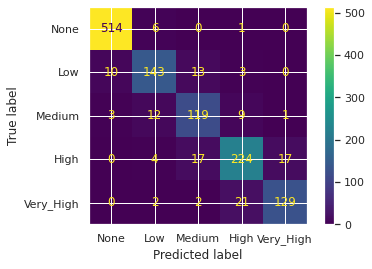

In [78]:
cm = confusion_matrix(y_test, pred_dtc)
cmd = ConfusionMatrixDisplay(cm, display_labels=['None', 'Low', 'Medium', 'High', 'Very_High'])
cmd.plot()

# SVC Model

### Cross Validation

In [79]:
cross_val_model = SVC(random_state=RANDOM_SEED)
scores = cross_val_score(cross_val_model,x,np.ravel(y),cv=10)
scores

array([0.438, 0.438, 0.412, 0.43 , 0.42 , 0.412, 0.43 , 0.424, 0.42 ,
       0.436])

In [80]:
print("RESULT: %0.2f accuracy with a standard deviation of %0.2f \n" % (scores.mean(), scores.std()))

RESULT: 0.43 accuracy with a standard deviation of 0.01 



### Hold-out

In [81]:
model = SVC(random_state=RANDOM_SEED)
model.fit(X_train,np.ravel(y_train))

SVC(random_state=2022)

In [82]:
predictions = model.predict(X_test)

In [83]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.43 accuracy


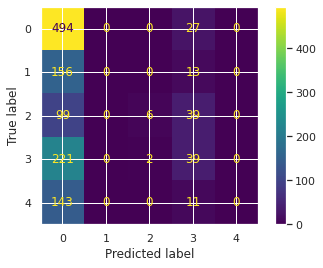

In [84]:
plot_confusion_matrix(model, X_test, y_test)

### Grid Search

In [85]:
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(random_state=RANDOM_SEED),param_grid,refit=True,verbose=3)

In [86]:
grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.403 total time=   2.1s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.401 total time=   1.9s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.401 total time=   1.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.401 total time=   2.3s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.403 total time=   1.7s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.485 total time=   1.9s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.479 total time=   1.6s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.459 total time=   1.1s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.501 total time=   0.9s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.488 total time=   0.9s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.419 total time=   0.9s
[CV 2/5] END .................C=0.1, gamma=0.01

KeyboardInterrupt: 

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.01}

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.01, random_state=2022)

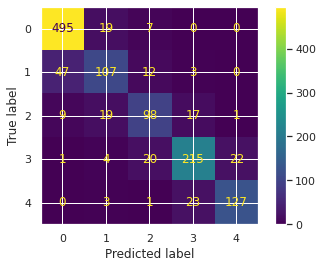

In [ ]:
plot_confusion_matrix(grid, X_test, y_test)

In [ ]:
grid_predicitions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test, grid_predicitions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       521
           1       0.70      0.63      0.67       169
           2       0.71      0.68      0.70       144
           3       0.83      0.82      0.83       262
           4       0.85      0.82      0.84       154

    accuracy                           0.83      1250
   macro avg       0.80      0.78      0.79      1250
weighted avg       0.83      0.83      0.83      1250



# K-means CLustering

In [ ]:
from sklearn.datasets import make_blobs


data = make_blobs(n_samples=5000, n_features=2, centers=5, cluster_std=1.8, random_state=RANDOM_SEED)
xk = data[0]
yk = data[1]

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=RANDOM_SEED)
kmeans.fit(xk)

KMeans(n_clusters=5, random_state=2022)

In [ ]:
y_pred = kmeans.predict(xk)
y_pred

array([3, 4, 2, ..., 2, 1, 2], dtype=int32)

In [ ]:
yk

array([2, 3, 0, ..., 0, 3, 0])

In [ ]:
print(classification_report(yk, y_pred))

              precision    recall  f1-score   support

           0       0.01      0.01      0.01      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.06      0.06      0.06      1000
           4       0.67      0.70      0.68      1000

    accuracy                           0.15      5000
   macro avg       0.15      0.15      0.15      5000
weighted avg       0.15      0.15      0.15      5000



In [ ]:
print(confusion_matrix(yk, y_pred))

[[  6   0 994   0   0]
 [991   0   9   0   0]
 [  0  81   1 906  12]
 [  0 603   0  59 338]
 [  0 287   0  17 696]]


## Random Forest

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,np.ravel(y_train))

RandomForestClassifier()

In [ ]:
n_estimators = [int(x) for x in np.linspace (start = 100, stop = 300, num= 3)] 
max_features = ['auto', 'sqrt'] 
max_depth = [2,6,10,20,] 
min_samples_split = [2, 5] 
min_samples_leaf = [1, 2] 
bootstrap = [True, False]

In [ ]:
# Create the param grid 
param_grid = {'n_estimators': n_estimators, 
              'max_features': max_features, 
              'max_depth': max_depth, 
              'min_samples_split': min_samples_split, 
              'min_samples_leaf': min_samples_leaf, 
              'bootstrap': bootstrap } 
              
print (param_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV 

rf_RandomGrid = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, cv = 3, verbose=1, n_jobs = -1, n_iter = 5, scoring = 'f1_weighted')

In [ ]:
rf_RandomGrid.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 6, 10, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   scoring='f1_weighted', verbose=1)

In [ ]:
rfc = rf_RandomGrid.best_estimator_

In [ ]:
print (f'Train {rf_RandomGrid.score (X_train, y_train):.3f}')
print(f'Test {rf_RandomGrid.score (X_test, y_test):.3f}')

Train 0.999
Test 0.921


In [ ]:
pred_rfc = rfc.predict(X_test)

In [ ]:
accuracy_score(y_test,pred_rfc)

0.9216

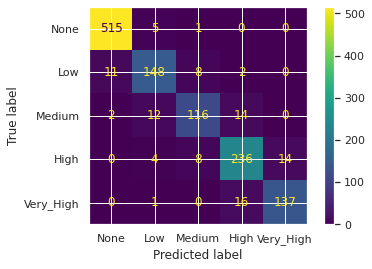

In [ ]:
cm = confusion_matrix(y_test,pred_rfc)
cmd = ConfusionMatrixDisplay(cm,display_labels=['None','Low','Medium','High','Very_High'])
cmd.plot()

In [ ]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       521
           1       0.87      0.88      0.87       169
           2       0.87      0.81      0.84       144
           3       0.88      0.90      0.89       262
           4       0.91      0.89      0.90       154

    accuracy                           0.92      1250
   macro avg       0.90      0.89      0.90      1250
weighted avg       0.92      0.92      0.92      1250



# Test Data Predictions to CSV

In [ ]:
# Fazer a previsão com o RFC
predictions =  rfc.predict(test)

# Adicionar header
submission = pd.DataFrame(predictions, columns = ["incidents"]).head(1207)
#submission.insert(0, 'RowId', range(1,(len(submission)+1)))
submission.index.name = 'RowId'
submission.index += 1

# Trocar para valores categóricos
submission['incidents'] = submission['incidents'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})



#Passar para um ficheiro CSV
submission.to_csv('submissionRFC.csv', index=True, header=True)

In [ ]:
# Fazer previsão com o DFC
predictions = clf.predict(test)

# Adicionar header
submission = pd.DataFrame(predictions, columns = ["incidents"]).head(1207)
#submission.insert(0, 'RowId', range(1,(len(submission)+1)))
submission.index.name = 'RowId'
submission.index += 1

# Trocar para valores categóricos
submission['incidents'] = submission['incidents'].replace({0 : 'None', 1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very_High'})



#Passar para um ficheiro CSV
submission.to_csv('submission8.csv', index=True, header=True)